In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams.update({'font.size': 20})

In [3]:
pi=np.array([2.0/3,1.0/3])   # beginning distribution (as stationary distribution)
A=np.array([[.95,.05],[.1,.9]])   # Transition matrix
B=np.array([[1.0/6 for i in range(6)],[.1,.1,.1,.1,.1,.5]])  # Emission matrix
L=300

In [4]:
def generate_st(weights):  # generate next state
    choice = random.random()
    for i, w in enumerate(weights):
        choice -= w
        if choice < 0:
            return i

In [6]:
# function generate a sequence HMM
def hidden_seq():
    out=[0 for i in range(L)]
    out[0]=generate_st(pi)
    for i in range(1,L):
        out[i]=generate_st(A[out[i-1]])
    return out
   
def obs_seq(hidden):
    out=[0 for i in range(L)]
    for i in range(L):
        out[i]=generate_st(B[hidden[i]])
    return out

In [25]:
hidden=np.array(hidden_seq())
observed=np.array(obs_seq(hidden))
hidden

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
def viterbi(obs_seq,pi, A, B):
    # returns the most likely state sequence given observed sequence x
    # using the Viterbi algorithm
    T = len(obs_seq)
    N = A.shape[0]
    delta = np.zeros((T, N))
    psi = np.zeros((T, N))
    delta[0] = pi*B[:,obs_seq[0]]
    for t in range(1, T):
        for j in range(N):
            delta[t,j] = np.max(delta[t-1]*A[:,j]) * B[j, obs_seq[t]]
            psi[t,j] = np.argmax(delta[t-1]*A[:,j])

    # backtrack
    states = np.zeros(T, dtype=np.int32)
    states[T-1] = np.argmax(delta[T-1])
    for t in range(T-2, -1, -1):
        states[t] = psi[t+1, states[t+1]]
    return states

In [26]:
path=viterbi(observed,pi, A, B)

In [27]:
path

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
def forward(obs_seq, pi, A, B):
    T = len(obs_seq)
    N = A.shape[0]
    forw = np.zeros((T, N))
    forw[0] = pi*B[:,obs_seq[0]]
    for t in range(1, T):
        forw[t] = np.dot(forw[t-1],A) * B[:, obs_seq[t]]
    proba = forw[-1].sum()
    return forw, proba

In [28]:
forw, prob_forw = forward(observed, pi, A, B)
prob_forw

4.35154801687087e-224

In [13]:
def backward(obs_seq, A, B):
    N = A.shape[0]
    T = len(obs_seq)

    back = np.zeros((N,T))
    back[:,-1:] = 1

    for t in reversed(range(T-1)):
        for n in range(N):
            back[n,t] = np.sum(back[:,t+1] * A[n,:] * B[:, obs_seq[t+1]])
    
    proba = np.sum(pi * B[:, obs_seq[0]] * back[:,0])

    return back, proba

In [29]:
back, prob_back=backward(observed, A, B)

In [30]:
prob_back

4.351548016870873e-224

In [31]:
post_prob=(np.multiply(forw,back.T) / prob_forw) # posterior probabilities

In [32]:
post_prob

array([[0.1804943 , 0.8195057 ],
       [0.17487154, 0.82512846],
       [0.12480355, 0.87519645],
       [0.12617167, 0.87382833],
       [0.08777839, 0.91222161],
       [0.0902723 , 0.9097277 ],
       [0.13670721, 0.86329279],
       [0.14124689, 0.85875311],
       [0.10549447, 0.89450553],
       [0.11375456, 0.88624544],
       [0.0843667 , 0.9156333 ],
       [0.0929718 , 0.9070282 ],
       [0.06592779, 0.93407221],
       [0.07162325, 0.92837675],
       [0.04372286, 0.95627714],
       [0.04223548, 0.95776452],
       [0.0653398 , 0.9346602 ],
       [0.1413273 , 0.8586727 ],
       [0.16730214, 0.83269786],
       [0.15243701, 0.84756299],
       [0.19086425, 0.80913575],
       [0.18618537, 0.81381463],
       [0.24441418, 0.75558582],
       [0.43685242, 0.56314758],
       [0.53636287, 0.46363713],
       [0.57808634, 0.42191366],
       [0.57675698, 0.42324302],
       [0.53190532, 0.46809468],
       [0.42769256, 0.57230744],
       [0.22731732, 0.77268268],
       [0.

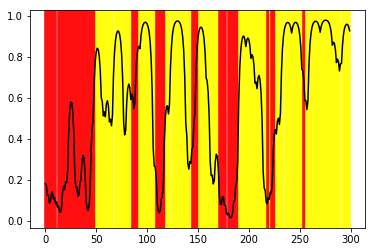

In [33]:
# Plot posterior probabilities (black line) and sequence hidden state (yellow - "Fair", Red - "Unfair")
for i in range(300):
    if hidden[i] == 0:
        plt.axvline(x = i, color ='yellow' )
    else:
        plt.axvline(x = i, color = 'red')
plt.plot(range(L), post_prob[:,0],color = 'black')

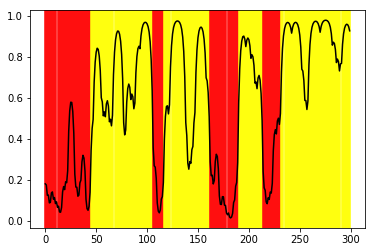

In [34]:
# Plot posterior probabilities (black line) and the most probably path, generated Viterbi (yellow - "Fair", Red - "Unfair")
for i in range(L):
    if path[i] == 0:
        plt.axvline(x = i, color ='yellow')
    else:
        plt.axvline(x = i, color = 'red')
plt.plot(range(L), post_prob[:,0],color = 'black')

TEST

In [35]:
# Observation from book "Biological sequence analysis"
obs_test = np.loadtxt('C:/Users/User/Desktop/HMM/obs_sequence_D.txt',dtype=np.int32) 

In [40]:
forw_test, proba_test = forward(obs_test, pi, A, B)

In [62]:
# generate 1000 observed states
gen_seq_test = [np.asarray(obs_seq(hidden_seq())) for i in range(1000)]

In [63]:
forw_proba_test= [forward(i, pi, A, B)[1] for i in gen_seq_test] # probabilities sor generated states

In [64]:
dover = 0
for i in forw_proba_test:
    if i < proba_test:
        dover += 1
dover /= 1000
print(dover)

0.754
